# Lab Tutorial 05
## Learning Outcomes
In this tutorial, again we will be using the randomization function we defined for the previous assignment. We will also learn to calculate new test statistics. Also, we will be playing around with p-values!

We'll be using the student performance dataset again!

# Import packages and load in the dataset

In [4]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt 
%matplotlib inline

import numpy as np
import pandas as pd

In [5]:
# load in the dataset and display it
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# 1. Writing functions with flexible inputs (task 2)
We will be doing the exact same thing as in Assignment 4.


We want to test the hypothesis that male students are more likely than female students to take test preparation course. Under this hypothesis the p(completed|male) should be higher than p(completed|female).<br>
What is the null hypothesis?

## Write a function that calculates p(completed|female)-p(completed|male)
For now, this will be our test statistic (like in Assignment04)

In [6]:
def prob_diff(data):
    
    # generate the contingency table
    tab = pd.crosstab(data['test preparation course'] == 'completed', data['gender'], margins = True)
    
    # calculate the difference
    p_diff = (tab['male'][True]/tab['male']['All']) - (tab['female'][True]/tab['female']['All'])
    
    return p_diff

## Use the same function for permutation testing with "flexible" inputs
We will modify the function a little, so that its inputs are more "flexible".<br>
When making the inputs flexible, you will have to make sure that there will be no discrepancies. For example, for the fcn input, you will write the functions that are calculating the stat. All of those functions should have the same number and type of inputs and outputs.

In [7]:
def permutation_test(data, shuffle = 'gender', numIter = 1000, fcn = prob_diff):
    
#     shuffle = 'dirGender'
#     numIter = 500
    
    stat = np.zeros(numIter, dtype = 'float64') # initialize the numpy array that will store the test stat
    
    ## 1. shuffling the "exchangeable" variable
    i = 0 # iteration variable
    while i < numIter:
        
        ## permute (shuffle) the exchangeable variable
        tmpDf = df.copy() # make a copy of the dataframe so that we don't modify the original dataframe object
        sInd  = np.array(range(len(tmpDf.index))) # creates a new np array that will contain the indeces. These indeces will then be shuffled
        
        np.random.shuffle(sInd) # shuffling the indeces (will be used to shuffle (permute) the gender)
        
        tmpGender = tmpDf[shuffle].iloc[sInd] # shuffling the gender
        tmpGender = tmpGender.reset_index(drop = True) # reorder the shuffled indeces (the gender variable has already been shuffled)
        
        ## insert the shuffled variable into the dataframe
        tmpDf[shuffle] = tmpGender
        
        ## calculate the test stat.
        stat[i] = fcn(tmpDf)
        i += 1
        
    ## 2. plotting the histogram of the test statistic
    plt.figure()
    plt.hist(stat, bins = 10)
    empStat = prob_diff(data)
    plt.axvline(x = empStat, color = 'r')
    
    plt.show()
    
    ## 3. calculating the p-value (one-sided)
    p_value = sum(stat >= empStat)/len(stat)   
    
    print('P-value of the randomisation test is p=',p_value)
    
    return p_value

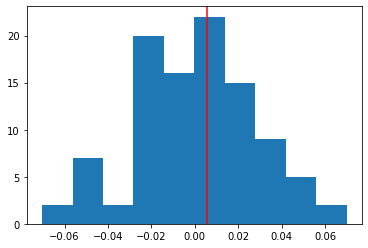

P-value of the randomisation test is p= 0.48


In [9]:
p = permutation_test(df, numIter = 100)

# 2. Now lets test another hypothesis
The hypothesis we'll be testing is as follows:<br>
Parental level of education and sompleting the test preparation course by the student are dependent. Completing test preparation course vary by parental level of education.

What is the null hypothesis in this case?


H0: completing the test preparation course is INDEPENDENT from parental level of education.

## To test idependence, we will be usig Chi-squared test of independence! (slides: [5:10])
You will need to write a function that calculates the Chi-squared statistic.

The chi2-test statistics measures the deviation between the observed counts for each cell and the expected counts under the Null-hypothesis. In this case it will be calculating the deviation between the observed value and expected value under the null hypothesis that parental level and taking the test preparation course are independent. 

Calculation steps are as follows:


### 2.1. Create a contingency table with parental level of education and test preparation course as rows and columns
This table will be given you the __"Observed"__ values

In [10]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [12]:
# The observed values in a contingency table!
table = pd.crosstab(df["parental level of education"], df["test preparation course"])
table

test preparation course,completed,none
parental level of education,,
associate's degree,82,140
bachelor's degree,46,72
high school,56,140
master's degree,20,39
some college,77,149
some high school,77,102


### 2.2. Convert the table to a numpy array
To calculate the deviation between the observed and expected values, we will be doing a simple subtraction. It would be much easier if we have the observed variable in form of a numpy array, so that we are able to do the operations on numpy arrays (matrices).

In [13]:
# The observed values in a numpy array (matrix)
table_array = np.array(table)

# Compare the types 
print(type(table))
print(type(table_array))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [14]:
display(table)
print(table_array)

test preparation course,completed,none
parental level of education,,
associate's degree,82,140
bachelor's degree,46,72
high school,56,140
master's degree,20,39
some college,77,149
some high school,77,102


[[ 82 140]
 [ 46  72]
 [ 56 140]
 [ 20  39]
 [ 77 149]
 [ 77 102]]


### 2.3 Generate a table that shows the expected frequencies if test preparation course and parental level of education were independen (Slide 7)
Expected count(A,B) = Marginal counts (A)  * Marginal counts (B) / table total

#### First take a look at the contingency table again

In [15]:
# First let's take a look at the contingency table again
table

test preparation course,completed,none
parental level of education,,
associate's degree,82,140
bachelor's degree,46,72
high school,56,140
master's degree,20,39
some college,77,149
some high school,77,102


#### Now let's take a look at the numpy array version of it

In [17]:
# See the correspondence between the numpy array and the contingency table
table_array

array([[ 82, 140],
       [ 46,  72],
       [ 56, 140],
       [ 20,  39],
       [ 77, 149],
       [ 77, 102]], dtype=int64)

#### <font color = 'red'> Now let's _Initialize_ the numpy array which will be holding the expected values!
it will be the same size as the array for the observed values

In [19]:
# first get the dimensions of the observed_array
nrow, ncol = table_array.shape

# Initialize the expected_array to be all zeros
expected_array = np.zeros([nrow, ncol])
expected_array

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

### 2.4 You'll be filling in the expected values using a loop
* initialize the array before the loop
* use the number of rows and columns (r and c) to loop through all the elements

Here, as an example, we will calculate the expected value for one of the entries.<br>
_Hint_ : Use indices to get the elements that you want and also to fill in the elements in the expected array

In [21]:
table

test preparation course,completed,none
parental level of education,,
associate's degree,82,140
bachelor's degree,46,72
high school,56,140
master's degree,20,39
some college,77,149
some high school,77,102


In [22]:
# Now as an example, let's calculate the expected count for 'high school degree' and 'completed'
# Expected count(A,B) = Marginal counts (A)  * Marginal counts (B) / table total
# first let's take a look at the variables again
observed_count = table_array[2, 0]
print(observed_count)

56


#### To get the marginal counts, you will need to use python's sum()
The following link gives you a definition for all of python's built-in functions:<br>
https://docs.python.org/3/library/functions.html

Let's see how the sum() function works:


In [31]:
# Apply sum() to observed_array (2-D array)
## It returs the sum of all the elements on the columns
### so the first element will be the sum of elements on the first column and so forth ...
s_observed = sum(table_array)
print(table_array)

s_observed_col = np.sum(table_array, axis = 0)
s_observed_col

[[ 82 140]
 [ 46  72]
 [ 56 140]
 [ 20  39]
 [ 77 149]
 [ 77 102]]


array([358, 642], dtype=int64)

In [32]:
s_observed_row = np.sum(table_array, axis = 1)
s_observed_row

array([222, 118, 196,  59, 226, 179], dtype=int64)

In [33]:
# What will sum() do if its input is 1D?


In [34]:
# Now calculate the expected value for high school and completed!
## get the marginal counts 
marginal_H = s_observed_row[2]
marginal_C = s_observed_col[0]

## get the expected
# Expected count(A,B) = Marginal counts (A)  * Marginal counts (B) / table total
expected_array[2, 0] = (marginal_H*marginal_C)/np.sum(table_array)

expected_array

array([[ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [70.168,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ]])

<font color = 'red'> Loop through elements with indexing and do the same thing as above 

### 2.5 The deviation will be calculated as follows:
$χ^2 = \sum_i(O_i-E_i)^2/E_i)$

You can just apply math operations like subtraction, addition, etc. to the elements of a numpy array.

Basically, we will be calculating the difference, raise the difference to the power of two and divide that by the second numpy array!

In [35]:
# print both arrays
print(table_array)
print(expected_array)

[[ 82 140]
 [ 46  72]
 [ 56 140]
 [ 20  39]
 [ 77 149]
 [ 77 102]]
[[ 0.     0.   ]
 [ 0.     0.   ]
 [70.168  0.   ]
 [ 0.     0.   ]
 [ 0.     0.   ]
 [ 0.     0.   ]]


In [36]:
# Calculate the difference between the arrays
Diff = table_array - expected_array
Diff

array([[ 82.   , 140.   ],
       [ 46.   ,  72.   ],
       [-14.168, 140.   ],
       [ 20.   ,  39.   ],
       [ 77.   , 149.   ],
       [ 77.   , 102.   ]])

In [37]:
# square!
## see how the operation is performed element-wise
Diff2 = Diff ** 2
Diff2

array([[ 6724.      , 19600.      ],
       [ 2116.      ,  5184.      ],
       [  200.732224, 19600.      ],
       [  400.      ,  1521.      ],
       [ 5929.      , 22201.      ],
       [ 5929.      , 10404.      ]])

In [39]:
# divide by the expected array
## now here, as we have zeros in the expected_array we will get ZeroDivisionError or you might get a warning
Div = Diff2/expected_array
Div

<ipython-input-39-5ea8dada4a12>:3: RuntimeWarning: divide by zero encountered in true_divide
  Div = Diff2/expected_array


array([[       inf,        inf],
       [       inf,        inf],
       [2.86073743,        inf],
       [       inf,        inf],
       [       inf,        inf],
       [       inf,        inf]])

In [41]:
# combine all these operations into one line!
X2_1 = np.sum((table_array - expected_array)**2/expected_array)
X2_1

<ipython-input-41-e7c1cad68cd7>:2: RuntimeWarning: divide by zero encountered in true_divide
  X2_1 = np.sum((table_array - expected_array)**2/expected_array)


inf

In [40]:
# Sum
X2_2 = np.sum(Div)
X2

inf

In [14]:
# Do the calculations with two random arrays


### 2.6 Put the expected value into a contingency table (optional)
You may want to create a table of the expected value!

In [45]:
# create a dataframe
Expected_table = pd.DataFrame(expected_array)
display(Expected_table)

# # set the columns to be the same as table_array
Expected_table.columns = table.columns

# # set the index to be the same as table_array
Expected_table.index = table.index

Expected_table


,0,1
0,0.000,0.0
1,0.000,0.0
2,70.168,0.0
3,0.000,0.0
4,0.000,0.0
5,0.000,0.0


test preparation course,completed,none
parental level of education,,
associate's degree,0.000,0.0
bachelor's degree,0.000,0.0
high school,70.168,0.0
master's degree,0.000,0.0
some college,0.000,0.0
some high school,0.000,0.0


* Determine the H0
* Determine the exchangeable variable under the H0
* determine the proper stat to test the H0
* if we are testing for independance -> X2

Function for the X2 stat

* contingency table
* convert contingency table to a numpy array
* initialize an array that will contain the expected counts
* loop through all the elements of the observed array and calculate the expected value for each
* calculate the X2
* returns X2

In [46]:
p = permutation_test(df, shuffle = 'parental level of education', numIter = 500, fcn = calc_X2)

NameError: name 'calc_X2' is not defined

# 3. Monte-carlo Simulation
Write a function (monteCarloSim) that simulates coin tossing. On each trial, the function should produce a specific number (N) of coin tosses and record the number of successes (heads). It should repeat this experiment numIter number of times. The inputs to the function should be a) probability of a success on each coin toss, b) the number of coin tosses per trial (N) and c) the number of trials. The function should return an np.array(range(numIter)) that holds the recorded number of heads for all trials (see lecture handout for tips).

monteCarloSim(a=probability,N=numberOfCoin,numIter)<br>
    for numIter<br>
        $\;\;\;\;$Generate new sample of N coin tosses<br>
        $\;\;\;\;$record number of heads in array X<br>        
        
**What are the inputs?**
* probability of H0. Probability array will be calculated based on this single value
* Number of heads (successes). Be careful with how you define success. success could mean complication!
* number of times you want to simulate the coin toss (same as numIter).

Goal: simulate a coin tossing experiment: we toss the coin N times and we record the heads.

We do the experiment numIter times.

## 3.1 Generate a specific number of 1s and 0s (as heads and tails)
to simulate coin tosses, we will use numpy.random.choice:<br>
https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.choice.html

Let's take a look at np.random.choice options <br>
numpy.random.choice(a, size=None, replace=True, p=None).

In [50]:
# To draw numbers with specific probability values, your first input should be a 1D array and the the p input 
# will be an array with the same size.
# To simulate coin tosses, lets assume that heads are 1s and tails are 0s.
# if a coin is fair before tossing we know that the probability of head is 0.5.
# heads: 1, tails: 0
sim = np.random.choice(a = [0, 1], size = 100, replace = True, p = [0.5, 0.5])
print(type(sim))
print(sim.shape)
print(sim)

# be careful when you are creating the numpy array for probabilities!
# If my first input to np.random.choice is [0, 1], then the first element in p is the probability of 0 (tails/failiure)!

<class 'numpy.ndarray'>
(100,)
[1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1
 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1]


## 3.2 Record the number of heads (successes) for an iteration
Remember, again you need to do the whole thing numIter times. For each iteration, calculate the number of heads and record it in an array! (you have to initialize the array before the loop for numIter)

In [51]:
# we have an array of only 0s and 1s.
# the number of 1s (the number of heads/sucesses) will be:
num_heads = np.sum(sim)
num_heads

42

# 4. Monte-carlo Test

Write a function (monteCarloTest) that uses monteCarloSim to 
* simulate 1000 trials (coin tosses). numIter input to Monte-carlo simulation function. 
* The function should also plot a histogram of the recorded number of heads, and mark the real measured number with a vertical line (axvline). Heads are usually success. You can define success to be different things depending on the question! Complication can be success!
* The function should print out the probability that the simulated number of heads is smaller than or equal to the measured number of heads. 

Input arguments should be 
a) the probability of a success under the Null-hypothesis, 
b) the number of coin tosses per trial, and 
c) the measured number of heads. Use the function to evaluate the probability to get 3 complications in 62 cases if the probability of a complication in the population is known to be 10%.

In [ ]:
num_heads = monteCarloSim(a = [0, 1], N = 62, p = [0.9, 0.1])

* determine what you want to test
* can it be simulated with a problem with distinct outcomes? it usually has to have two outcomes -> monteCarloTest
* what are those outcomes? 
* What are the corresponding p-values to those outcomes?

* 0: tails 1: heads.
* determine the probability of heads and tails, you might have an unfair coin
* simulate coin tosses with np.random.choice
* record the number of 1s
* repeate the above steps numIter times
* plot the histogram or distribution of number of heads 
* calculate the p value

In [ ]:
monteCarloSim(a = [1, 2, 3, 4, 5, 6, 7], N = 10, p = [1/7, 1/7, ...])